In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Chnage the directory to Dataset directory

In [2]:
import os 
#Show the current directory  
os.getcwd()

'C:\\Users\\user\\Desktop'

In [4]:
#our data is not in our current working directory, so change the current directory  
os.chdir('D:\\STUDY-MART\\class-4\\assignment')
os.getcwd()

'D:\\STUDY-MART\\class-4\\assignment'

# Load the dataframe 

In [16]:
data= pd.read_csv('Height-Weight Data.csv')
df=data.copy()
df

In [17]:
#check if there is any null value in our data frame
df.isnull().any()

Height    False
Weight    False
dtype: bool

# Set the value of fetaure & Output

We will train the machine with the height-weight values.
 Then for a particular height value we will try to find weight

In [43]:
#height is our freature [two dimensinal]
x=df[['Height']];
#Machine will predict ouput [one dimensional]
y=df['Weight'];

In [72]:
x.shape
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [45]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

# Spliting the Dataset for regression model

In [40]:
#loading sklearn model for regression
from sklearn.model_selection import train_test_split

In [46]:
# 30 % data is set for test in (xtest,ytest) and 70% data is for training (xtrain,ytrain) 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Loading linear regression model

In [47]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()


# Get The value of m & c 

In [29]:
#value of m
reg.coef_

array([5.97744946])

In [30]:
#value of c 
reg.intercept_

-225.82603000755844

# Linear Equation

y = mx + c. 
where m is coefficient,
c is intercept,
x is independent,
y is dependent.

In [34]:
# In the equtaion m= reg.coef_ =5.977444946;  c= reg.intercept_ =-225.82603000
# Let xValue = x[0] = 73.847017 
yValue = reg.coef_ * 73.847017 + reg.intercept_
# The value of  will be closer to the value in the dataset. y[0] = 241.893563
yValue

array([215.59078201])

# Predict the value of y for all x

In [39]:
newDf=data.copy()
newDf['output'] = reg.predict(df[['Height']])
newDf

,Height,Weight,output
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
...,...,...,...
3496,69.296830,185.649086,188.392269
3497,70.542201,210.198845,195.836414
3498,73.912549,202.429960,215.982497
3499,67.396021,144.277671,177.030278


# Deduce the Score of the Learning

In [48]:
reg.score(xtest,ytest)

0.7313258168853622

# Draw the best fit line

In [64]:
#for all the value of x predict the value of y
yVal=reg.predict(df[['Height']])

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

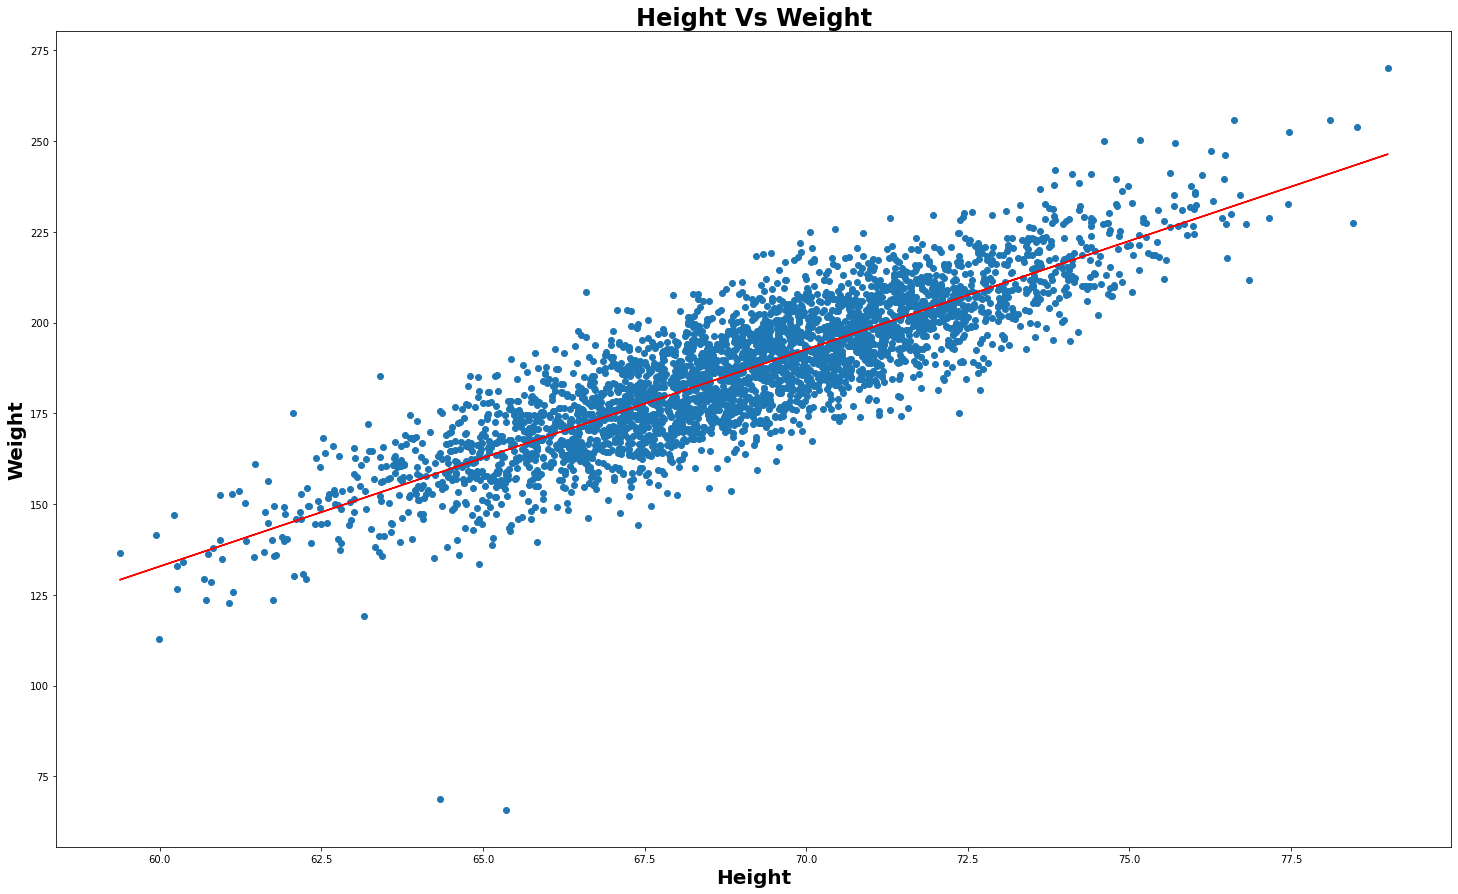

In [69]:
plt.figure(figsize=(25,15))
# scatter plot is just pointing in the graph
plt.scatter(df['Height'],df['Weight'])
# the red colored line is the best fir line 
plt.plot(df[['Height']],yVal,color='red')
# Visualization headings
plt.xlabel("Height",fontsize=20,fontweight='bold')
plt.ylabel("Weight",fontsize=20,fontweight='bold')
plt.title("Height Vs Weight",fontsize=24,fontweight='bold')
plt.show()